#Recognition of human activity

### Welcome to the  create notebook of Artificial Inteligence model

In [1]:
#importing all libraries and functions necesary
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [2]:
#conect with drive and clone the repositorie
drive.mount("/content/drtive")

!git clone https://github.com/Nahuel404/Reconocimiento_human_activity.git /content/drive/MyDrive/Reconocimiento_human_activity

os.chdir('/content/drive/MyDrive/Reconocimiento_human_activity/UCI HAR Dataset/')

Mounted at /content/drtive
Cloning into '/content/drive/MyDrive/Reconocimiento_human_activity'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 52 (delta 3), reused 13 (delta 2), pack-reused 36
Receiving objects: 100% (52/52), 82.33 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (32/32), done.


In [3]:
#assign the datasets
Xtrain = np.array(pd.read_csv('../Xtrain.csv'))
Xtest = np.array(pd.read_csv('../Xtest.csv'))

Ytrain = np.array(pd.read_csv('./train/y_train.txt'))
Ytest = np.array(pd.read_csv('./test/y_test.txt'))

print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(7351, 561) (7351, 1) (2946, 561) (2946, 1)


In [4]:
#I applied PCA(Principal Components Analysis) alorithm to reduce the number of features
scaler = StandardScaler()
features_scaled_train = scaler.fit_transform(Xtrain)
features_scaled_test = scaler.transform(Xtest)

pca = PCA()
features_pca_train = pca.fit_transform(features_scaled_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

pca = PCA(n_components=num_components)
features_reduced_train = pca.fit_transform(features_scaled_train)

features_reduced_test = pca.transform(features_scaled_test)


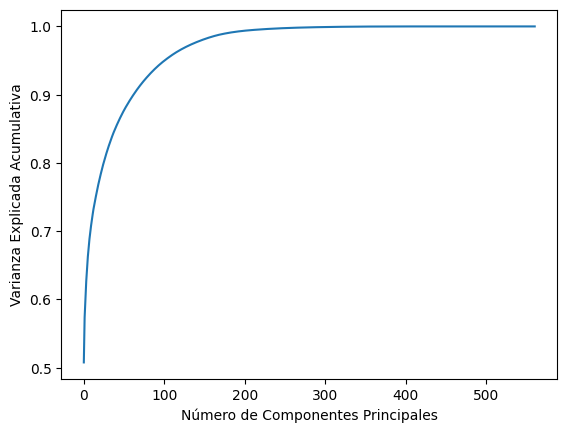

Número óptimo de componentes principales: 102


In [5]:
#Let's see how the information gain is described taking the variance as a metric of this
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

print(f"Número óptimo de componentes principales: {num_components}")

In [6]:
print(features_reduced_train.shape, features_reduced_test.shape) #we observe the new shape

(7351, 102) (2946, 102)


In [7]:
#let's see each label and how many we have of each ones
unique_elements, counts = np.unique(Ytrain, return_counts=True)

values_train = dict(zip(unique_elements, counts))

unique_elements, counts = np.unique(Ytest, return_counts=True)

values_test = dict(zip(unique_elements, counts))

print(values_train, values_test)

{1: 1226, 2: 1073, 3: 986, 4: 1286, 5: 1373, 6: 1407} {1: 496, 2: 471, 3: 420, 4: 491, 5: 531, 6: 537}


In [10]:
#We applied "one hot encoding" to categorical classes
Ytrain_one_hot = to_categorical(Ytrain - 1, num_classes=6)
Ytest_one_hot = to_categorical(Ytest - 1, num_classes=6)

In [59]:
#Created five types of Neural Networks to evaluate the accuracy of each ones and select the better architecture
First_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(256, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(64, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Second_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Third_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(256, activation = "relu"),
    Dense(128, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Fourth_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(102, activation = "relu"),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Fifth_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(1024, activation = "relu"),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(6, activation = "softmax")
])

In [60]:
First_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Second_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Third_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Fourth_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Fifth_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

In [61]:
# Entrenamiento del primer modelo
history_first = First_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 61ms/step - loss: 1.5670 - accuracy: 0.3849 - val_loss: 1.2058 - val_accuracy: 0.6431
Epoch 2/100
6/6 [==============================] - 0s 46ms/step - loss: 0.9930 - accuracy: 0.7032 - val_loss: 0.7290 - val_accuracy: 0.7634
Epoch 3/100
6/6 [==============================] - 0s 39ms/step - loss: 0.6231 - accuracy: 0.7777 - val_loss: 0.4579 - val_accuracy: 0.8749
Epoch 4/100
6/6 [==============================] - 0s 44ms/step - loss: 0.4389 - accuracy: 0.8367 - val_loss: 0.3536 - val_accuracy: 0.8953
Epoch 5/100
6/6 [==============================] - 0s 37ms/step - loss: 0.3361 - accuracy: 0.8793 - val_loss: 0.3078 - val_accuracy: 0.8763
Epoch 6/100
6/6 [==============================] - 0s 38ms/step - loss: 0.2742 - accuracy: 0.8896 - val_loss: 0.2539 - val_accuracy: 0.9082
Epoch 7/100
6/6 [==============================] - 0s 37ms/step - loss: 0.2367 - accuracy: 0.9014 - val_loss: 0.2617 - val_accuracy: 0.8987
Epoch 8/100
6/6 [===

In [62]:
# Entrenamiento del segundo modelo
history_second = Second_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 79ms/step - loss: 1.6102 - accuracy: 0.3629 - val_loss: 1.3224 - val_accuracy: 0.5785
Epoch 2/100
6/6 [==============================] - 0s 58ms/step - loss: 1.1279 - accuracy: 0.6638 - val_loss: 0.8477 - val_accuracy: 0.7784
Epoch 3/100
6/6 [==============================] - 0s 54ms/step - loss: 0.7582 - accuracy: 0.7709 - val_loss: 0.5916 - val_accuracy: 0.8749
Epoch 4/100
6/6 [==============================] - 0s 53ms/step - loss: 0.5666 - accuracy: 0.8083 - val_loss: 0.4584 - val_accuracy: 0.8491
Epoch 5/100
6/6 [==============================] - 0s 50ms/step - loss: 0.4523 - accuracy: 0.8423 - val_loss: 0.3510 - val_accuracy: 0.9055
Epoch 6/100
6/6 [==============================] - 0s 53ms/step - loss: 0.3681 - accuracy: 0.8590 - val_loss: 0.2903 - val_accuracy: 0.9096
Epoch 7/100
6/6 [==============================] - 0s 55ms/step - loss: 0.3154 - accuracy: 0.8789 - val_loss: 0.2577 - val_accuracy: 0.9028
Epoch 8/100
6/6 [===

In [63]:
# Entrenamiento del tercer modelo
history_third = Third_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 1.5634 - accuracy: 0.4333 - val_loss: 1.1394 - val_accuracy: 0.7226
Epoch 2/100
6/6 [==============================] - 0s 36ms/step - loss: 0.9280 - accuracy: 0.7532 - val_loss: 0.7119 - val_accuracy: 0.7240
Epoch 3/100
6/6 [==============================] - 0s 44ms/step - loss: 0.6146 - accuracy: 0.7985 - val_loss: 0.4772 - val_accuracy: 0.8586
Epoch 4/100
6/6 [==============================] - 0s 35ms/step - loss: 0.4443 - accuracy: 0.8500 - val_loss: 0.3570 - val_accuracy: 0.9021
Epoch 5/100
6/6 [==============================] - 0s 34ms/step - loss: 0.3356 - accuracy: 0.8786 - val_loss: 0.2782 - val_accuracy: 0.9171
Epoch 6/100
6/6 [==============================] - 0s 42ms/step - loss: 0.2733 - accuracy: 0.8963 - val_loss: 0.2385 - val_accuracy: 0.9143
Epoch 7/100
6/6 [==============================] - 0s 37ms/step - loss: 0.2266 - accuracy: 0.9146 - val_loss: 0.2023 - val_accuracy: 0.9388
Epoch 8/100
6/6 [===

In [64]:
# Entrenamiento del cuarto modelo
history_fourth = Fourth_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 59ms/step - loss: 1.5531 - accuracy: 0.3548 - val_loss: 1.1969 - val_accuracy: 0.5710
Epoch 2/100
6/6 [==============================] - 0s 38ms/step - loss: 1.0057 - accuracy: 0.6648 - val_loss: 0.7743 - val_accuracy: 0.7995
Epoch 3/100
6/6 [==============================] - 0s 38ms/step - loss: 0.6937 - accuracy: 0.7469 - val_loss: 0.5553 - val_accuracy: 0.7750
Epoch 4/100
6/6 [==============================] - 0s 38ms/step - loss: 0.5124 - accuracy: 0.8085 - val_loss: 0.3945 - val_accuracy: 0.8804
Epoch 5/100
6/6 [==============================] - 0s 39ms/step - loss: 0.3967 - accuracy: 0.8473 - val_loss: 0.4129 - val_accuracy: 0.8695
Epoch 6/100
6/6 [==============================] - 0s 38ms/step - loss: 0.3176 - accuracy: 0.8747 - val_loss: 0.2482 - val_accuracy: 0.9007
Epoch 7/100
6/6 [==============================] - 0s 37ms/step - loss: 0.2525 - accuracy: 0.8986 - val_loss: 0.2136 - val_accuracy: 0.9279
Epoch 8/100
6/6 [===

In [65]:
# Entrenamiento del quinto modelo
history_fifth = Fifth_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 3s 77ms/step - loss: 1.6666 - accuracy: 0.2660 - val_loss: 1.4096 - val_accuracy: 0.3263
Epoch 2/100
6/6 [==============================] - 0s 51ms/step - loss: 1.2299 - accuracy: 0.4262 - val_loss: 0.9533 - val_accuracy: 0.5180
Epoch 3/100
6/6 [==============================] - 0s 56ms/step - loss: 0.9309 - accuracy: 0.5139 - val_loss: 0.7642 - val_accuracy: 0.6152
Epoch 4/100
6/6 [==============================] - 0s 60ms/step - loss: 0.7755 - accuracy: 0.6257 - val_loss: 0.6344 - val_accuracy: 0.6975
Epoch 5/100
6/6 [==============================] - 0s 50ms/step - loss: 0.6037 - accuracy: 0.7230 - val_loss: 0.5091 - val_accuracy: 0.7865
Epoch 6/100
6/6 [==============================] - 0s 51ms/step - loss: 0.4711 - accuracy: 0.8053 - val_loss: 0.3776 - val_accuracy: 0.8470
Epoch 7/100
6/6 [==============================] - 0s 56ms/step - loss: 0.3833 - accuracy: 0.8420 - val_loss: 0.3425 - val_accuracy: 0.8579
Epoch 8/100
6/6 [===

In [66]:
epochs = np.arange(1,101)#array of the number of epochs

La mejor época es 96 con un rendimiento de 0.9598912596702576.
El mínimo número de épocas necesarias es 8.


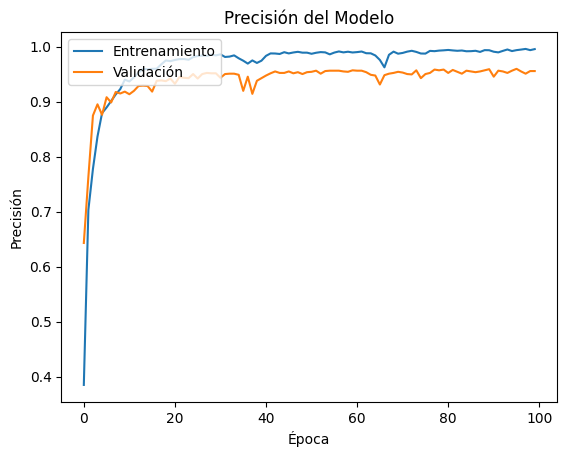

In [67]:
#Let's see the adjust respect to the number of epoch
plt.plot(history_first.history['accuracy'])
plt.plot(history_first.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

metricas = history_first.history['val_accuracy']

max_rendimiento = max(metricas)
epoca_max_rendimiento = metricas.index(max_rendimiento) + 1


umbral_rendimiento = 0.9
mejor_numero_epocas = epoca_max_rendimiento

for i in range(epoca_max_rendimiento - 1, 0, -1):
    if metricas[i] < umbral_rendimiento:
        break
    mejor_numero_epocas = i + 1

print(f"La mejor época es {epoca_max_rendimiento} con un rendimiento de {max_rendimiento}.")
print(f"El mínimo número de épocas necesarias es {mejor_numero_epocas}.")


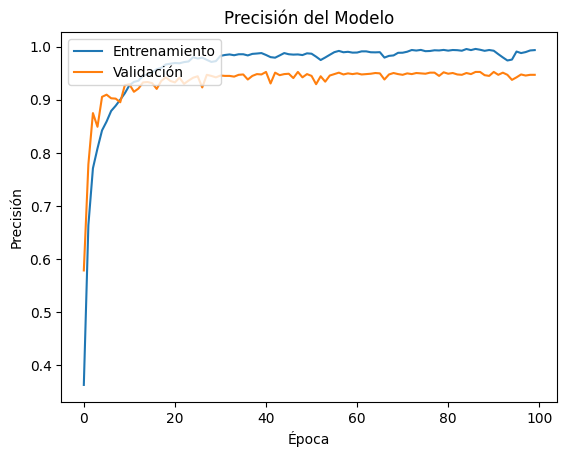

In [68]:
plt.plot(history_second.history['accuracy'])
plt.plot(history_second.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

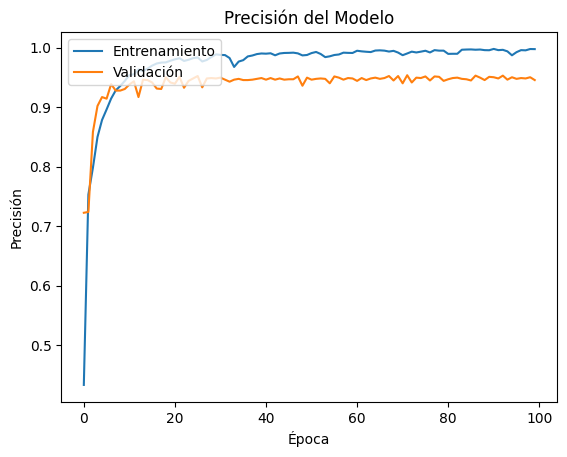

In [69]:
plt.plot(history_third.history['accuracy'])
plt.plot(history_third.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

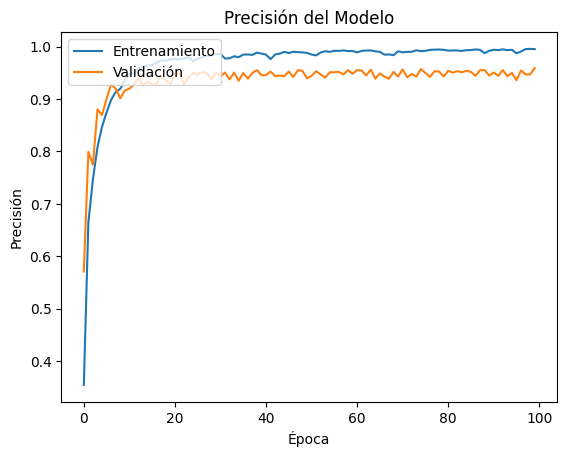

In [71]:
plt.plot(history_fourth.history['accuracy'])
plt.plot(history_fourth.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

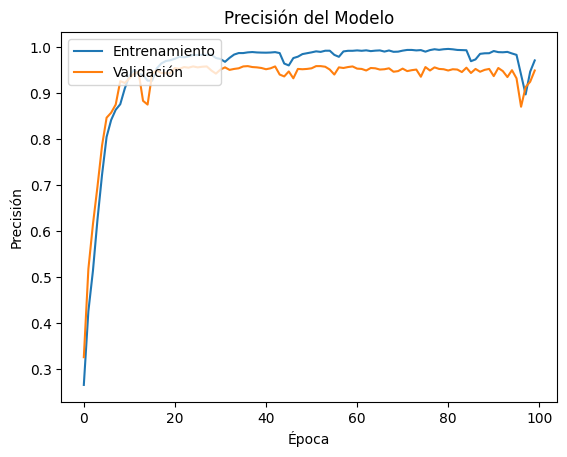

In [72]:
plt.plot(history_fifth.history['accuracy'])
plt.plot(history_fifth.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

In [70]:
# Evaluate the model on the test dataset
eval_results = First_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results[1]}')
print(First_NN.summary())

93/93 [==============================] - 2s 18ms/step - loss: 0.2952 - accuracy: 0.9263
Pérdida en el conjunto de prueba: 0.2951764166355133
Precisión en el conjunto de prueba: 0.9263408184051514
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 102)               57324     
                                                                 
 dense_56 (Dense)            (None, 256)               26368     
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 6)                 390       
                                                       

In [73]:
# Evaluate the model on the test dataset
eval_results = Second_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results[1]}')
print(Second_NN.summary())

93/93 [==============================] - 1s 14ms/step - loss: 0.2724 - accuracy: 0.9345
Pérdida en el conjunto de prueba: 0.2723875641822815
Precisión en el conjunto de prueba: 0.9344874620437622
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 102)               57324     
                                                                 
 dense_61 (Dense)            (None, 128)               13184     
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dense_64 (Dense)            (None, 6)                 390       
                                                       

In [74]:
# Evaluate the model on the test dataset
eval_results = Third_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results[1]}')
print(Third_NN.summary())

93/93 [==============================] - 2s 17ms/step - loss: 0.3383 - accuracy: 0.9223
Pérdida en el conjunto de prueba: 0.33825355768203735
Precisión en el conjunto de prueba: 0.922267496585846
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 102)               57324     
                                                                 
 dense_66 (Dense)            (None, 256)               26368     
                                                                 
 dense_67 (Dense)            (None, 128)               32896     
                                                                 
 dense_68 (Dense)            (None, 6)                 774       
                                                                 
Total params: 117362 (458.45 KB)
Trainable params: 117362 (458.45 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [75]:
# Evaluate the model on the test dataset
eval_results = Fourth_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results[1]}')
print(Fourth_NN.summary())

93/93 [==============================] - 2s 17ms/step - loss: 0.2729 - accuracy: 0.9355
Pérdida en el conjunto de prueba: 0.27287524938583374
Precisión en el conjunto de prueba: 0.935505747795105
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 102)               57324     
                                                                 
 dense_70 (Dense)            (None, 102)               10506     
                                                                 
 dense_71 (Dense)            (None, 256)               26368     
                                                                 
 dense_72 (Dense)            (None, 128)               32896     
                                                                 
 dense_73 (Dense)            (None, 6)                 774       
                                                       

In [76]:
# Evaluate the model on the test dataset
eval_results = Fifth_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results[1]}')
print(Fifth_NN.summary())

93/93 [==============================] - 3s 33ms/step - loss: 0.2221 - accuracy: 0.9321
Pérdida en el conjunto de prueba: 0.2220596969127655
Precisión en el conjunto de prueba: 0.9321113228797913
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 102)               57324     
                                                                 
 dense_75 (Dense)            (None, 1024)              105472    
                                                                 
 dense_76 (Dense)            (None, 512)               524800    
                                                                 
 dense_77 (Dense)            (None, 256)               131328    
                                                                 
 dense_78 (Dense)            (None, 128)               32896     
                                                       

Best option is the fourth_NN because have an accuracy of 93,5% in 2 second of compute

In [77]:
Fourth_NN.save('modelo_RHA.h5')#Save the model in a ".h5" archive

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
from google.colab import files #dowload in my PC
files.download('modelo_RHA.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>